# Regularization Parameter: Lasso

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

## Training

In [2]:
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
df = pd.read_csv(data_url).iloc[:,1:].dropna()

df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
df = pd.DataFrame(preprocessing.scale(df), columns=df.columns)

num_rows = df.shape[0]
trainsize = int(num_rows / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# TRAINING - simple model
Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# New features for more complex model
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# TRAINING – complex model
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

## Testing

In [3]:
# TESTING - simple model
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# New features for more complex model
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# TESTING - complex model
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

## Ridge Regression

In [69]:
def run_ridge_model(alpha, x, y, x_test, y_test):
    ridgeregr = linear_model.Ridge(alpha=alpha, fit_intercept=False) 
    ridgeregr = ridgeregr.fit(x, y)
    answer = {'R²': ridgeregr.score(x, y), 'coef': ridgeregr.coef_, 'intercept': ridgeregr.intercept_, 'score': ridgeregr.score(x_test, y_test)}
    return answer

print('SIMPLE RIDGE MODEL:\n', run_ridge_model(10, X_train, Y_train, X_test, Y_test), '\n')
print('COMPLEX RIDGE MODEL:\n', run_ridge_model(10, X_train2, Y_train, X_test2, Y_test))

SIMPLE RIDGE MODEL:
 {'R²': 0.573873916440288, 'coef': array([[ 1.36988466e-02, -7.57859433e-01, -3.25298557e-04]]), 'intercept': 0.0, 'score': 0.5631088763076704} 

COMPLEX RIDGE MODEL:
 {'R²': 0.5739464289613441, 'coef': array([[-2.18345205e-03, -7.57156891e-01,  4.77049992e-02,
        -3.66908529e-03,  9.52109450e-03, -3.78154074e-03,
        -4.47224221e-03,  4.83414403e-04, -4.79227770e-06]]), 'intercept': 0.0, 'score': 0.5631804323930691}


## Lasso Regression

In [68]:
def run_lasso_model(alpha, x, y, x_test, y_test):
    lass = linear_model.Lasso(alpha=.35)
    lassfit = lass.fit(x, y)
    answer = {'R²': lass.score(x, y), 'coef': lassfit.coef_, 'intercept': lassfit.intercept_, 'score': lass.score(x_test, y_test)}
    return answer

print('SIMPLE LASSO MODEL:\n', run_lasso_model(0.35, X_train, Y_train, X_test, Y_test), '\n')
print('COMPLEX LASSO MODEL:\n', run_lasso_model(0.35, X_train2, Y_train, X_test2, Y_test))

SIMPLE LASSO MODEL:
 {'R²': 0.450062579301185, 'coef': array([-0.        , -0.40657726, -0.        ]), 'intercept': array([0.00114596]), 'score': 0.44553225151184195} 

COMPLEX LASSO MODEL:
 {'R²': 0.44363376712897096, 'coef': array([ 0.00000000e+00, -3.89351238e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.77688887e-04,
       -7.09158792e-07]), 'intercept': array([3.48711577]), 'score': 0.4380466345914476}


### Evaluating Predictive Power

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity. If $\lambda$ is too large, all parameters will be set to zero.

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

In [88]:
all_lambdas = range(25)
r_squareds_for_ridge = []
r_squareds_for_lasso = []

for lamb in all_lambdas:
    r_squareds_for_ridge.append(run_ridge_model(lamb, X_train2, Y_train, X_test2, Y_test)['R²'])
    r_squareds_for_lasso.append(run_lasso_model(lamb, X_train2, Y_train, X_test2, Y_test)['R²'])

print('Ridge R²:\n', r_squareds_for_ridge, '\n')
print('Lasso R²:\n', r_squareds_for_lasso)

Ridge R²:
 [0.5739733101711622, 0.5739686014515943, 0.5739638611812111, 0.5739600301399491, 0.5739570041443962, 0.5739545553546734, 0.5739525094004821, 0.5739507454493931, 0.5739491802023851, 0.5739477552957198, 0.5739464289613441, 0.5739451706647203, 0.5739439576355471, 0.5739427725837644, 0.5739416021654498, 0.5739404359309292, 0.5739392655893024, 0.5739380844848291, 0.5739368872176468, 0.5739356693648604, 0.5739344272725136, 0.5739331578982858, 0.5739318586910845, 0.5739305274980765, 0.5739291624918419] 

Lasso R²:
 [0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.44363376712897096, 0.4436337671

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.858825e-23
  overwrite_a=True).T


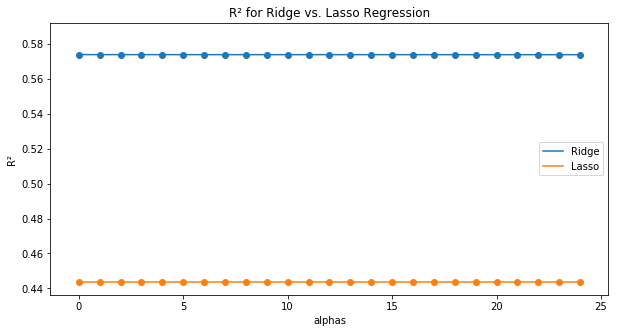

In [96]:
plt.figure(figsize=(10,5))

plt.scatter(all_lambdas, r_squareds_for_ridge)
plt.plot(all_lambdas, r_squareds_for_ridge, label="Ridge")

plt.scatter(all_lambdas, r_squareds_for_lasso)
plt.plot(all_lambdas, r_squareds_for_lasso, label="Lasso")

plt.title('R² for Ridge vs. Lasso Regression')
plt.xlabel('alphas')
plt.ylabel('R²')
plt.legend()

plt.show()